In [31]:
from StochasticProcesses import *
import scipy.stats as sp
from functools import partial

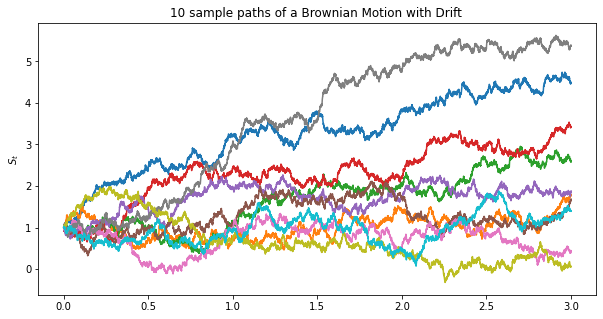

In [2]:
bm = BrownianMotionWithDrift(T=3, x0=1, mu=0.5, sigma=0.8)
bm.plotPaths(nPaths=10)

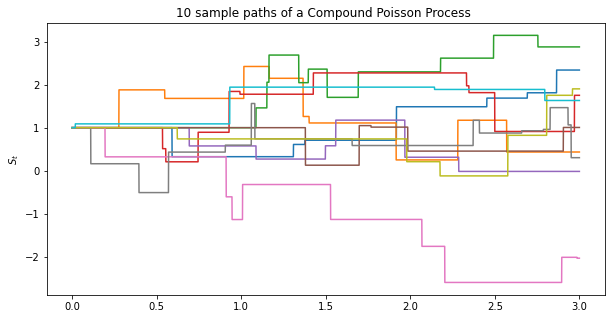

In [3]:
cp = CompoundPoissonProcess(lam=3, T=3, x0=1, jumpSizeRV=sp.uniform(loc=-1, scale=2))
cp.plotPaths(nPaths=10)

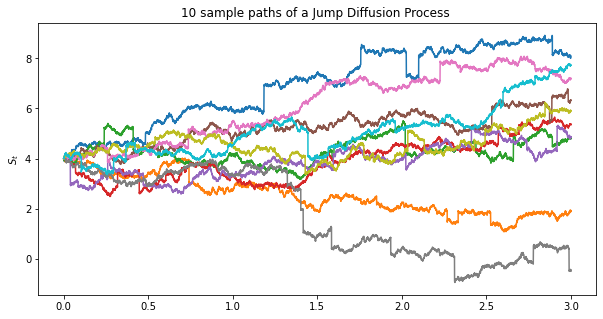

In [4]:
jd = JumpDiffusionProcess(bm, cp, x0=2)
jd.plotPaths(nPaths=10)

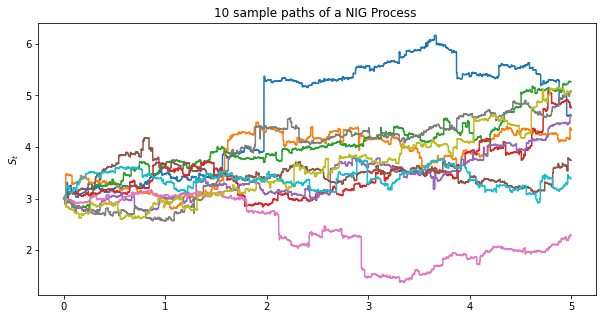

In [5]:
nig = NIGProcess(T=5, x0=3, nSteps=20000, theta=0.3, sigma=0.5, kappa=0.2)
nig.plotPaths(nPaths=10)

In [6]:
from OptionPricing import AssetModel

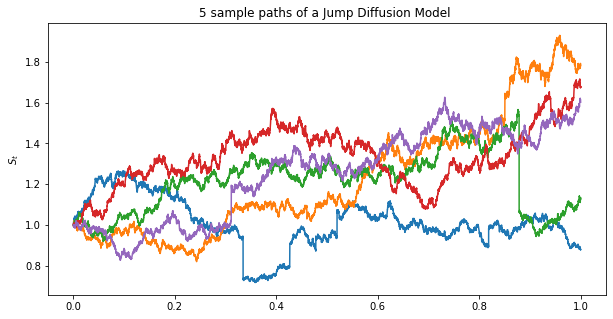

In [7]:
r = 0.3
sig = 0.3
lam = 3
jumpScale = 0.15
jumpRV = sp.norm(scale=jumpScale)
expMomJump = np.exp(jumpScale ** 2 / 2)
drift = r - sig **2 / 2 + lam * (1 - expMomJump)
jd = JumpDiffusionProcess(BrownianMotionWithDrift(mu=drift, sigma=sig), CompoundPoissonProcess(lam=lam, jumpSizeRV=jumpRV))
asset = AssetModel(jd, r=0.)
asset.plotPaths(nPaths=5)

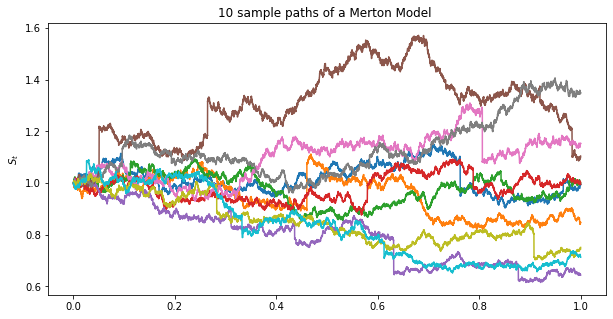

In [8]:
from OptionPricing import *
merton = MertonModel(r=0.1)
merton.plotPaths(nPaths=10)

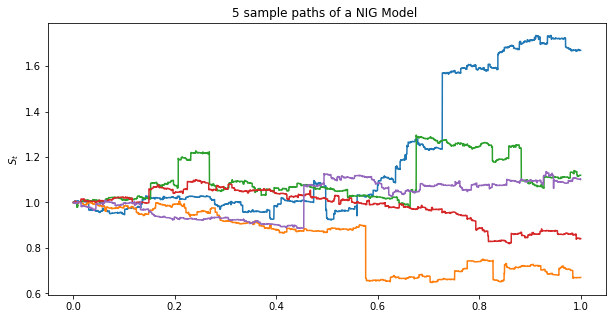

In [9]:
nig = NIGModel()
nig.plotPaths(nPaths=5)

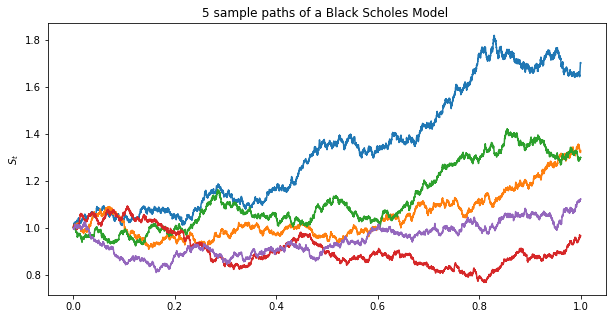

In [10]:
bs = BlackScholesModel()
bs.plotPaths(nPaths=5)

In [11]:
n = 1e6
print('Martingale Check (Difference to expected value)')
for model in [bs, merton, nig]:
    print('{}: {:.6f}'.format(model.name, model.generateValues(nVals=int(n)).mean() - np.exp(model.r)))

Martingale Check (Difference to expected value)
Black Scholes Model: -0.000030
Merton Model: -0.000541
NIG Model: -0.000156


In [12]:
k = 2
call = lambda x: np.maximum(x - k, 0)
for model in [bs, merton, nig]:
    print('{}: {:.6f}'.format(model.name, model.OptionPriceMC(call, 3)))

Black Scholes Model: 1.100136
Merton Model: 1.197251
NIG Model: 1.116250


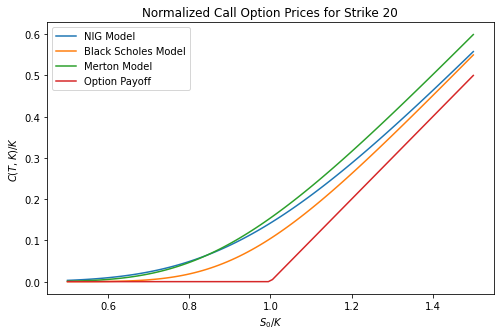

In [13]:
k = 20
call = lambda x: np.maximum(x - k, 0)
s = np.linspace(10, 30, 100)
plt.figure(figsize=(8, 5))
for model in [nig, bs, merton]:
    prices = model.OptionPriceRangeMC(call, s)
    plt.plot(s/k, prices/k, label=model.name)
plt.plot(s/k, call(s)/k, label='Option Payoff')
plt.xlabel('$S_0/K$')
plt.ylabel('$C(T,K)/K$')
plt.title('Normalized Call Option Prices for Strike {}'.format(k))
plt.legend()
plt.show()

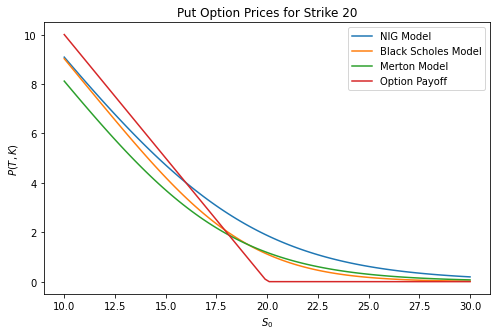

In [14]:
k = 20
put = lambda x: np.maximum(k - x, 0)
s = np.linspace(10, 30, 100)
plt.figure(figsize=(8, 5))
for model in [nig, bs, merton]:
    prices = model.OptionPriceRangeMC(put, s)
    plt.plot(s, prices, label=model.name)
plt.plot(s, put(s), label='Option Payoff')
plt.xlabel('$S_0$')
plt.ylabel('$P(T,K)$')
plt.title('Put Option Prices for Strike {}'.format(k))
plt.legend()
plt.show()

In [15]:
from AnalyticFormulas import blackScholesPrice

In [16]:
s = 25
k = 20
bs.OptionPriceMC(call, s, nSim=1000000) - blackScholesPrice(s, bs.r, bs.logPriceProcess.sigma, bs.T, k)

0.008134018848030777

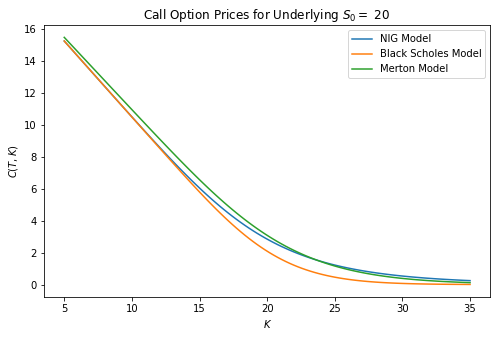

In [36]:
s = 20
strikes = np.linspace(5, 35, 100)
def call(x, strike): return np.maximum(x - strike, 0)
calls = [partial(call, strike=k) for k in strikes]
plt.figure(figsize=(8, 5))
for model in [nig, bs, merton]:
    prices = model.OptionPricePayOffRangeMC(calls, s)
    plt.plot(strikes, prices, label=model.name)
plt.xlabel('$K$')
plt.ylabel('$C(T,K)$')
plt.title('Call Option Prices for Underlying $S_0=$ {}'.format(s))
plt.legend()
plt.show()